In [1]:
import os
import cv2
import random
from imutils import paths

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
random.seed(42)

In [3]:
data=[]
labels=[]
image_path= sorted(list(paths.list_images('dataset/training_set')))

random.shuffle(image_path)

for path in image_path:
    image= cv2.imread(path)
    image= cv2.resize(image,(64,64))    
    data.append(image)
    
    label= path.split(os.path.sep)[-2]
    labels.append(label)

data=np.array(data,dtype='float')/255
labels=np.array(labels)

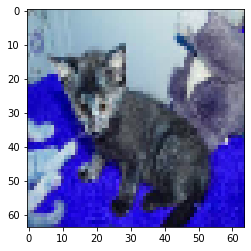

In [4]:
plt.imshow(data[1]);

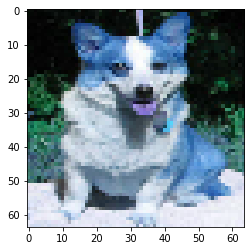

In [5]:
plt.imshow(data[10]);

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [7]:
def check_shape(df):
    print(df.shape)

In [8]:
print('X_training_shape')
check_shape(X_train)
print('X_test_shape')
check_shape(X_test)
print('Y_training_shape')
check_shape(y_train)
print('Y_test_shape')
check_shape(y_test)

X_training_shape
(3200, 64, 64, 3)
X_test_shape
(800, 64, 64, 3)
Y_training_shape
(3200,)
Y_test_shape
(800,)


In [9]:
cnn= tf.keras.Sequential([
    tf.keras.layers.Conv2D(30,activation='relu',input_shape=(64,64,3),strides=(2,2),kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(60,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(90,activation='relu',kernel_size=3),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [10]:
opti= 'adam'
loss='binary_crossentropy'
metrics= ['accuracy']
epoch=25
batch_size=32

In [11]:
cnn.compile(optimizer=opti,loss=loss,metrics=metrics)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le= LabelEncoder()

In [14]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [15]:
hist= cnn.fit(X_train,y_train,epochs=epoch,validation_data=(X_test,y_test),batch_size=batch_size)

Epoch 1/25
100/100 [==============================] - 8s 70ms/step - loss: 0.6963 - accuracy: 0.5189 - val_loss: 0.6879 - val_accuracy: 0.5325
Epoch 2/25
100/100 [==============================] - 5s 48ms/step - loss: 0.6852 - accuracy: 0.5525 - val_loss: 0.6939 - val_accuracy: 0.5125
Epoch 3/25
100/100 [==============================] - 4s 43ms/step - loss: 0.6578 - accuracy: 0.5963 - val_loss: 0.6719 - val_accuracy: 0.5462
Epoch 4/25
100/100 [==============================] - 4s 43ms/step - loss: 0.6431 - accuracy: 0.6295 - val_loss: 0.6241 - val_accuracy: 0.6375
Epoch 5/25
100/100 [==============================] - 4s 43ms/step - loss: 0.5827 - accuracy: 0.6845 - val_loss: 0.5938 - val_accuracy: 0.6775
Epoch 6/25
100/100 [==============================] - 5s 45ms/step - loss: 0.5143 - accuracy: 0.7404 - val_loss: 0.5798 - val_accuracy: 0.6938
Epoch 7/25
100/100 [==============================] - 4s 44ms/step - loss: 0.4632 - accuracy: 0.7771 - val_loss: 0.5917 - val_accuracy: 0.6787

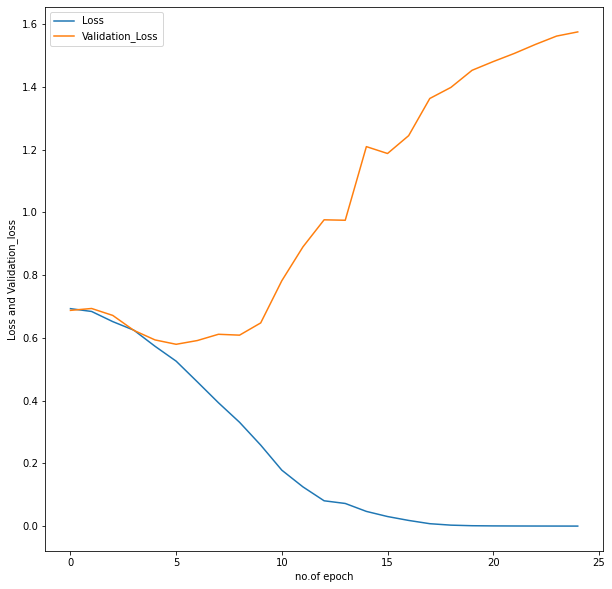

In [16]:
N= np.arange(0,epoch)

plt.figure(figsize=(10,10))
plt.plot(N,hist.history['loss'],label='Loss')
plt.plot(N,hist.history['val_loss'],label='Validation_Loss')
plt.xlabel('no.of epoch')
plt.ylabel('Loss and Validation_loss')
plt.legend();

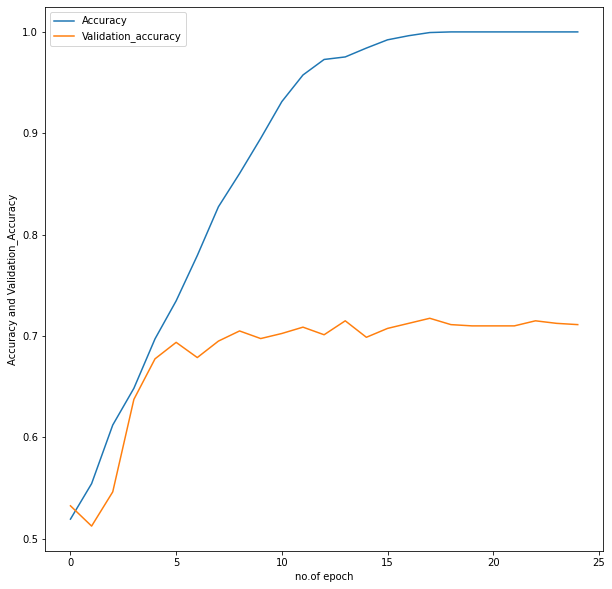

In [17]:
plt.figure(figsize=(10,10))
plt.plot(N,hist.history['accuracy'],label='Accuracy')
plt.plot(N,hist.history['val_accuracy'],label='Validation_accuracy')
plt.xlabel('no.of epoch')
plt.ylabel('Accuracy and Validation_Accuracy')
plt.legend();